<a href="https://colab.research.google.com/github/DostdarDost/Linear-Algrbra-for-Machine-Learning/blob/main/Dostdar_Ali_MS_Thesis_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Six Machine learning Algorithm**

In [ ]:
#libraries load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# step#2 data reading or load
df = pd.read_csv("/content/heart.csv", header = 0,index_col=0)
print("the data set has{} rows {}columus".format(df.shape[0],df.shape[1]))

the data set has303 rows 14columus


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
print('Packages imported...')

Packages imported...


In [ ]:
# creating a copy of df
df1 = df
# define the columns to be encoded and scaled
cat_cols = ['sex','exang','ca','cp','fbs','restecg','slope','thal']
con_cols = ["age","trestbps","chol","thalach","oldpeak"]
# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)
final_columns = df1.columns;
# defining the features and target
X = df1.drop(['target'],axis=1)
y = df1[['target']]
# instantiating the scaler
scaler = RobustScaler()
# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])


In [ ]:
# spliting method
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

1 **Support vector machine**



Accuracy of Support Vector Machine Classifier: 90.164 %

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



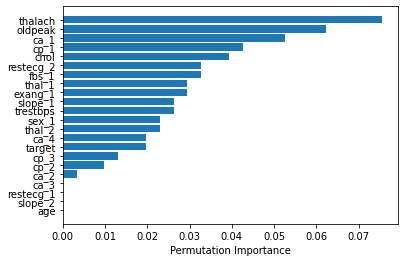

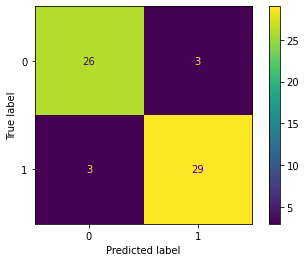

In [ ]:
# instantiating the object
svm = SVC()
# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}
# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)
# fitting the object
searcher.fit(X_train, y_train)
# feature importance
perm_importance = permutation_importance(searcher, X_test, y_test)
feature_names = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_1',
       'exang_1', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'cp_1', 'cp_2', 'cp_3',
       'fbs_1', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2', 'thal_1',
       'thal_2', 'thal_3']
features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
# predicting the values
y_pred = searcher.predict(X_test)
# confusion matrix and accuracy scores for y_test
acc_score = accuracy_score(y_test, y_pred)
print("\n")
print("Accuracy of Support Vector Machine Classifier: {:.3f}".format(acc_score*100),'%\n')

#Peport
print(classification_report(y_test, y_pred))

# display confussion matrix
cm = confusion_matrix(y_test,y_pred,labels=searcher.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=searcher.classes_)
disp.plot()
plt.show()



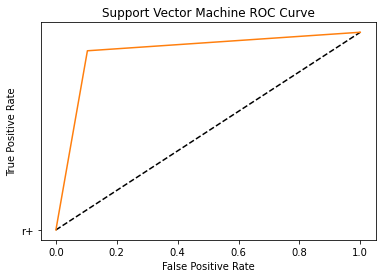

The test accuracy score of SVM after hyper-parameter tuning is  0.9016393442622951


In [ ]:


# instantiating the roc_cruve for y_test
fpr,tpr,threshols=roc_curve(y_test,y_pred)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Support Vector Machine')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Support Vector Machine ROC Curve")
plt.show()

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

2 **Logistic** **Regression**



Accuracy of Logistic Regression Classifier: 90.164 %

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



<function matplotlib.pyplot.show>

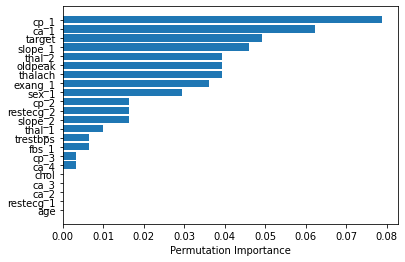

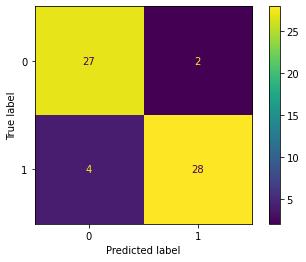

In [ ]:
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# feature importance
perm_importance = permutation_importance(logreg, X_test, y_test)
feature_names = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_1',
       'exang_1', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'cp_1', 'cp_2', 'cp_3',
       'fbs_1', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2', 'thal_1',
       'thal_2', 'thal_3']
features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)
# confusion matrix and accuracy scores for y_test
acc=accuracy_score(y_test,y_pred)
print("\n")
print("Accuracy of Logistic Regression Classifier: {:.3f}".format(acc*100),'%\n')

#Peport
print(classification_report(y_test, y_pred))
# disply confusion matrix
cm = confusion_matrix(y_test,y_pred,labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show






The test accuracy score of Logistric Regression is  0.9016393442622951


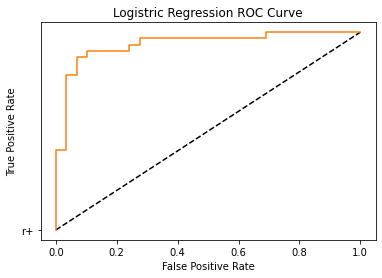

In [ ]:
# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))
# calculating the probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]
# instantiating the roc_cruve for y_test
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)
# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

3 **Decision** **Tree**



Accuracy of Decision tree Classifier: 80.328 %

              precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.88      0.72      0.79        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



<function matplotlib.pyplot.show>

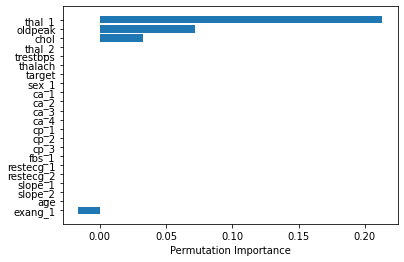

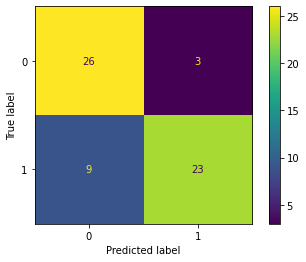

In [ ]:
# instantiating the object
dt =tree.DecisionTreeClassifier(random_state=42,ccp_alpha=0.013)
# fitting the object
dt.fit(X_train,y_train)

# feature importance
perm_importance = permutation_importance(dt, X_test, y_test)
feature_names = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_1',
       'exang_1', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'cp_1', 'cp_2', 'cp_3',
       'fbs_1', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2', 'thal_1',
       'thal_2', 'thal_3']
features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
#predict the object
y_pred = dt.predict(X_test)


# confusion matrix and accuracy scores for y_test
acc_score = accuracy_score(y_test, y_pred)
print("\n")
print("Accuracy of Decision tree Classifier: {:.3f}".format(acc_score*100),'%\n')

#Peport
print(classification_report(y_test, y_pred))
# disply confusion matrix
cm = confusion_matrix(y_test,y_pred,labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show


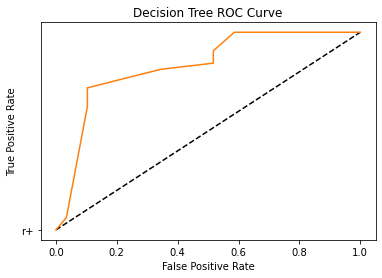

In [ ]:
# calculating the probabilities
y_pred_prob = dt.predict_proba(X_test)[:,1]
# instantiating the roc_cruve for y_test
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Support Vector Machine')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.show()

4 **Random forest** 

In [ ]:
rf = RandomForestClassifier(max_features=2, n_estimators=100)
rf.fit(X_train, y_train)
rf.predict(X_test)
rf.score(X_test, y_test)

0.8524590163934426



Accuracy of Random forest Classifier: 88.525 %

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



<function matplotlib.pyplot.show>

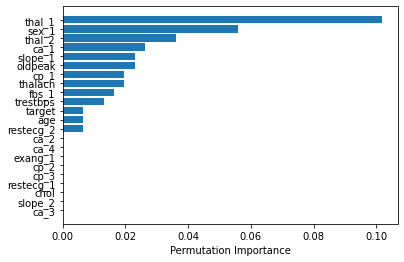

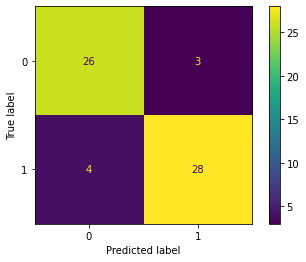

In [ ]:
# instantiating the object
rf = RandomForestClassifier(n_estimators = 100, random_state = 42,max_leaf_nodes=2)
# fitting the object
rf.fit(X_train, y_train)
 #predict the object
y_pred = rf.predict(X_test)
# feature importance
perm_importance = permutation_importance(rf, X_test, y_test)
feature_names = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_1',
       'exang_1', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'cp_1', 'cp_2', 'cp_3',
       'fbs_1', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2', 'thal_1',
       'thal_2', 'thal_3']
features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
# confusion matrix and accuracy scores for y_test
acc_score = accuracy_score(y_test, y_pred)
print("\n")
print("Accuracy of Random forest Classifier: {:.3f}".format(acc_score*100),'%\n')

#Peport
print(classification_report(y_test, y_pred))
# disply confusion matrix
cm = confusion_matrix(y_test,y_pred,labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show

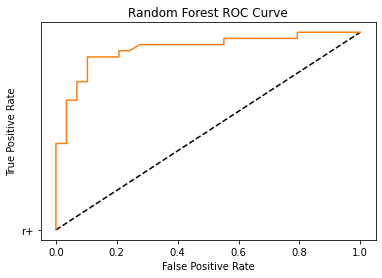

In [ ]:
# calculating the probabilities
y_pred_prob = rf.predict_proba(X_test)[:,1]
# instantiating the roc_cruve for y_test
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Support Vector Machine')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.show()

5 **k-nearest neighbors **



Accuracy of K-nearest neighbors Classifier: 90.164 %

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



<function matplotlib.pyplot.show>

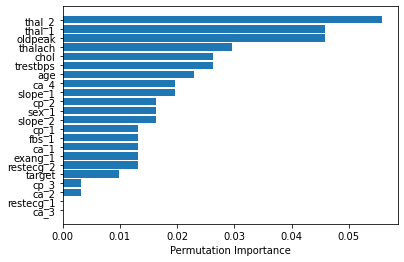

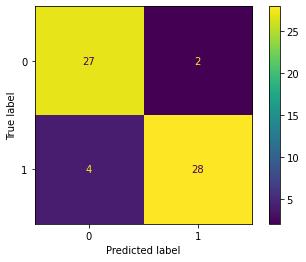

In [ ]:
# instanting Objects
knn = KNeighborsClassifier(n_neighbors = 11) 
#fitting objects 
knn.fit(X_train, y_train)
# predict the object
y_pred=knn.predict(X_test)
# feature importance
perm_importance = permutation_importance(knn, X_test, y_test)
feature_names = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_1',
       'exang_1', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'cp_1', 'cp_2', 'cp_3',
       'fbs_1', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2', 'thal_1',
       'thal_2', 'thal_3']
features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
# confusion matrix and accuracy scores for y_test
acc_scor = accuracy_score(y_test, y_pred)
print("\n")
print("Accuracy of K-nearest neighbors Classifier: {:.3f}".format(acc_scor*100),'%\n')

#Peport
print(classification_report(y_test, y_pred))
# disply confusion matrix
cm = confusion_matrix(y_test,y_pred,labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show


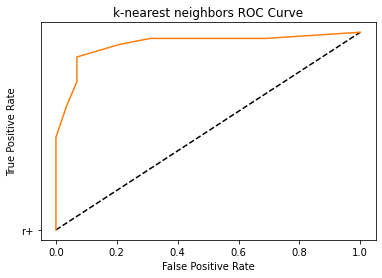

In [ ]:
# calculating the probabilities
y_pred_prob = knn.predict_proba(X_test)[:,1]

# instantiating the roc_cruve for y_test
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Support Vector Machine')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("k-nearest neighbors ROC Curve")
plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
#Initialising ANN
ann = tf.keras.models.Sequential()

In [ ]:
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
#Fitting ANN
ann.fit(X_train,y_train,batch_size=32,epochs = 100)
y_pred=ann.predict(X_test)

Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.7237 - accuracy: 0.1736
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7203 - accuracy: 0.0868
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 0.7167 - accuracy: 0.0372
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7133 - accuracy: 0.0289
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 0.7101 - accuracy: 0.0083
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7066 - accuracy: 0.0165
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7033 - accuracy: 0.0909
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7002 - accuracy: 0.4174
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6970 - accuracy: 0.5496
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.5496
Epoch 11/100
8/8 [==========

# New Section

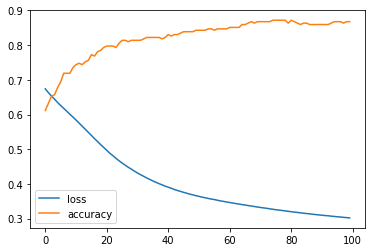

In [ ]:
losses=pd.DataFrame(ann.history.history)
losses.plot()


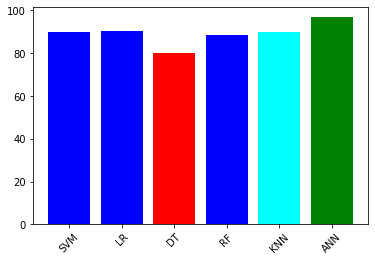

In [ ]:
# create a dataset
height = [90.16, 90.17, 80.33, 88.53, 90.16,96.87]
bars = ('SVM','LR', 'DT', 'RF', 'KNN', 'ANN')
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height, color=['BLUE','blue', 'red', 'blue', 'cyan', 'green'])

# Create names on the x-axis
plt.xticks(x_pos, bars,rotation=45)
# Show graph
plt.show()